In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [47]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [49]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [50]:
# rename the Income($)  column
df = df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [52]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Spending Score,0


NO MISSING VALUE


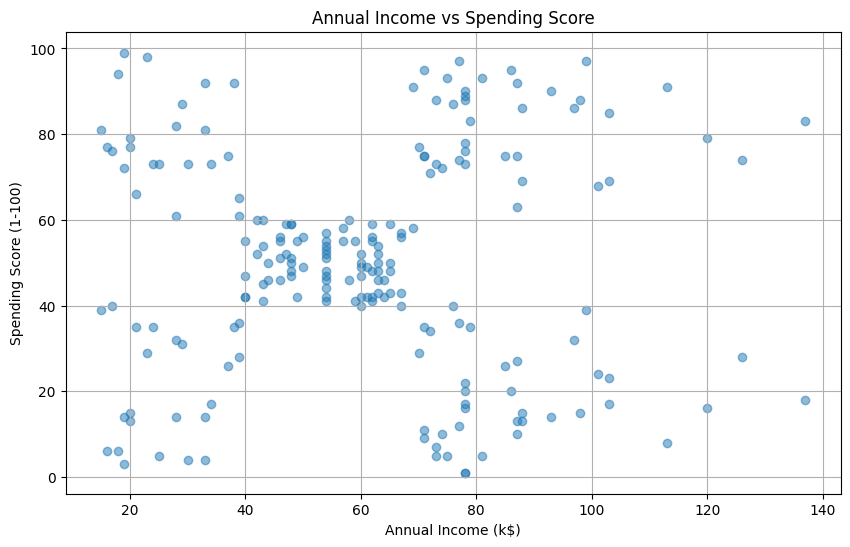

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Spending Score'], alpha=0.5)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

# INSIGHT

Based on the scatter plot of Annual Income versus Spending Score, there is no clear linear relationship between the two variables. Customers with high income do not necessarily have high spending scores, and vice versa. The plot reveals several potential clusters, such as customers with low income but high spending, and those with high income but low spending. This indicates that different customer groups exhibit distinct spending behaviors regardless of their income levels. These insights suggest that the mall can segment customers into groups with specific characteristics and develop targeted marketing strategies, such as offering exclusive promotions to high-income but low-spending customers or loyalty programs for those with high spending tendencies.

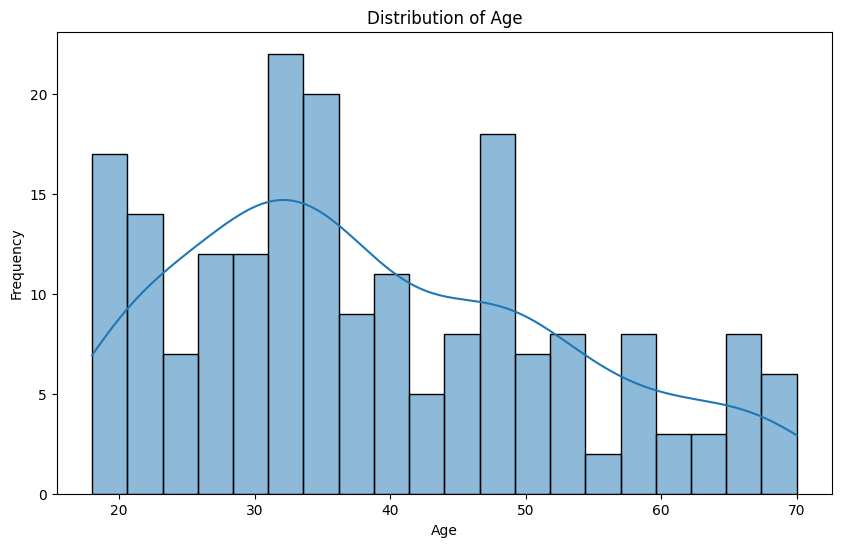

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# INSIGHT

Based on the age distribution chart, most customers are between 25 and 35 years old, indicating that the mall primarily attracts young adults. There is also a noticeable number of customers in their 40s and 50s, but the frequency gradually decreases among older age groups above 60. This suggests that the majority of the mall’s customers are within the working-age population, likely individuals with stable income and active spending habits. Understanding this distribution helps the business tailor its marketing strategies toward younger and middle-aged customers, such as offering lifestyle-oriented promotions or products that appeal to this demographic.

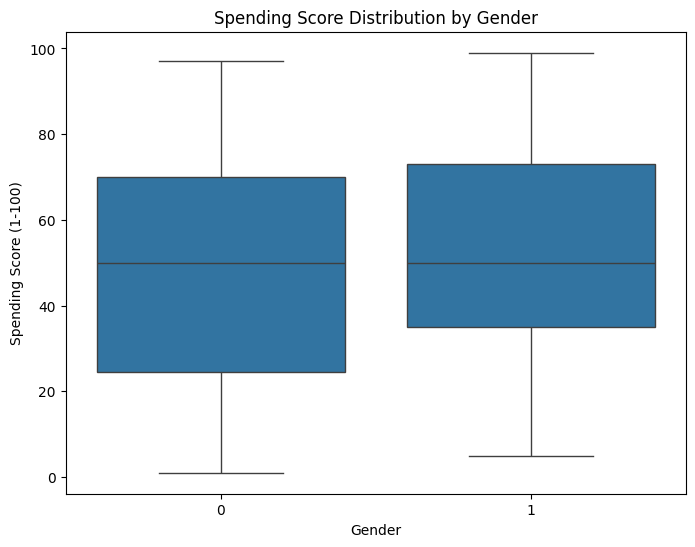

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score', data=df)
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

# INSIGHT

Based on the box plot of Spending Score by Gender, both male and female customers show a wide range of spending behaviors, with spending scores spread from low to high. However, the median spending score for both genders is quite similar, indicating that there is no significant difference in average spending tendencies between males and females. The interquartile range for females appears slightly wider, suggesting that female customers have more diverse spending habits, ranging from very low to very high spenders. This implies that marketing strategies should not rely solely on gender, as spending behavior varies greatly within both groups, and other factors such as income or age may play a stronger role in influencing spending.

In [56]:
# create new dataframe that consist only annual income and spending score
df_clustering = df[['Income', 'Spending Score']]
df_clustering.head()

,Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Data Scaling (Choose One)

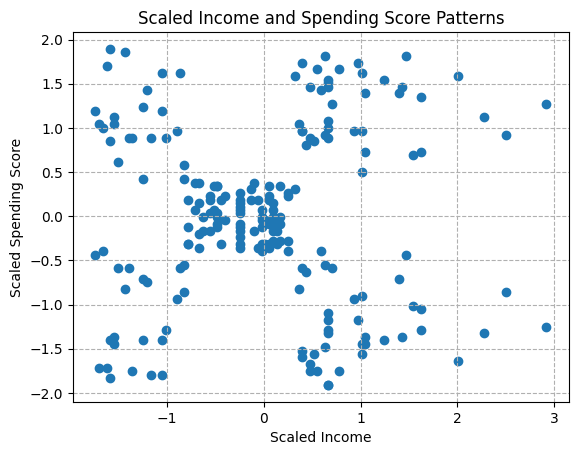

In [57]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df_clustering), columns=['Income', 'Spending Score'])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Income"], df_sc_scaled["Spending Score"])
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Spending Score")
plt.grid(axis='both', linestyle='--')
plt.title("Scaled Income and Spending Score Patterns")
plt.show()

# K-Means Clustering

In [58]:
from sklearn.cluster import KMeans

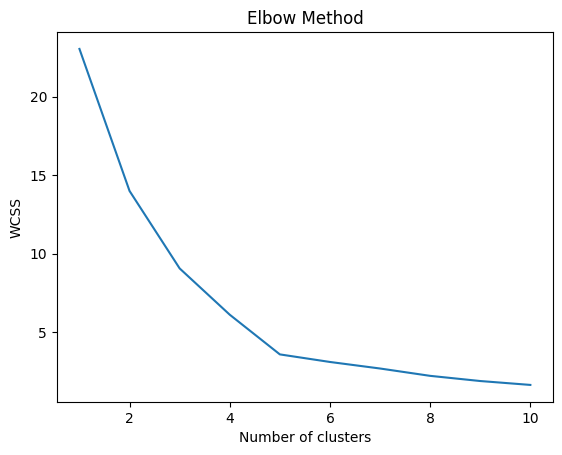

In [59]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_minmax_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the Elbow Method visualization, the optimal number of clusters is 5. This can be observed at the point where the decrease in WCSS (Within-Cluster Sum of Squares) starts to slow down significantly, forming an “elbow” shape around k = 5. Before this point, adding more clusters greatly reduces WCSS, meaning the model becomes more accurate. However, after 5 clusters, the improvement becomes marginal, indicating that additional clusters do not provide meaningful segmentation. Therefore, choosing 5 clusters achieves a good balance between model simplicity and segmentation accuracy, effectively grouping customers with similar income and spending behaviors.

In [60]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters       WCSS
0                   1  23.040720
1                   2  13.993505
2                   3   9.058985
3                   4   6.110312
4                   5   3.583118
5                   6   3.100344
6                   7   2.683891
7                   8   2.216099
8                   9   1.886340
9                  10   1.638289


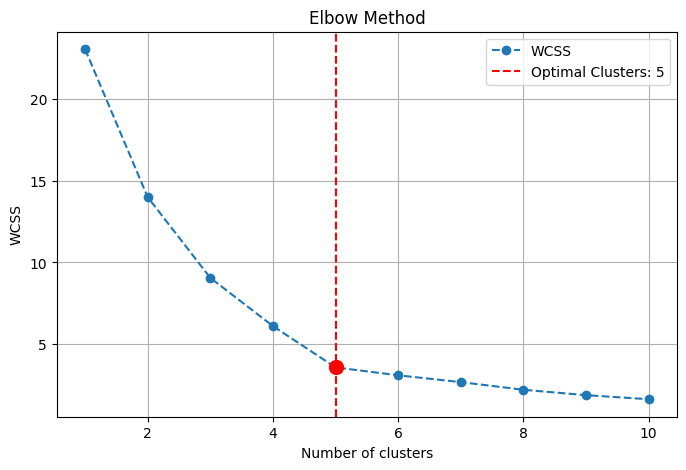

The optimal number of clusters is: 5


In [61]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

This Elbow Method chart shows the relationship between the number of clusters (k) and the Within-Cluster Sum of Squares (WCSS), which measures how tightly grouped the data points are within each cluster. As the number of clusters increases, the WCSS decreases — meaning the model fits the data better. However, after k = 5, the rate of decrease slows significantly, forming an “elbow” shape. This indicates that 5 clusters is the optimal choice, as adding more clusters beyond this point provides only minimal improvement in model performance. Therefore, segmenting the data into 5 clusters achieves a good balance between accuracy and simplicity, effectively capturing key patterns and distinctions among the data points.

In [62]:
# Fit K-Means to the data with the optimal number of K cluster = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_minmax_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,CustomerID,Gender,Age,Income,Spending Score,KMeans_Cluster
0,1,0,19,15,39,3
1,2,0,21,15,81,4
2,3,1,20,16,6,3
3,4,1,23,16,77,4
4,5,1,31,17,40,3


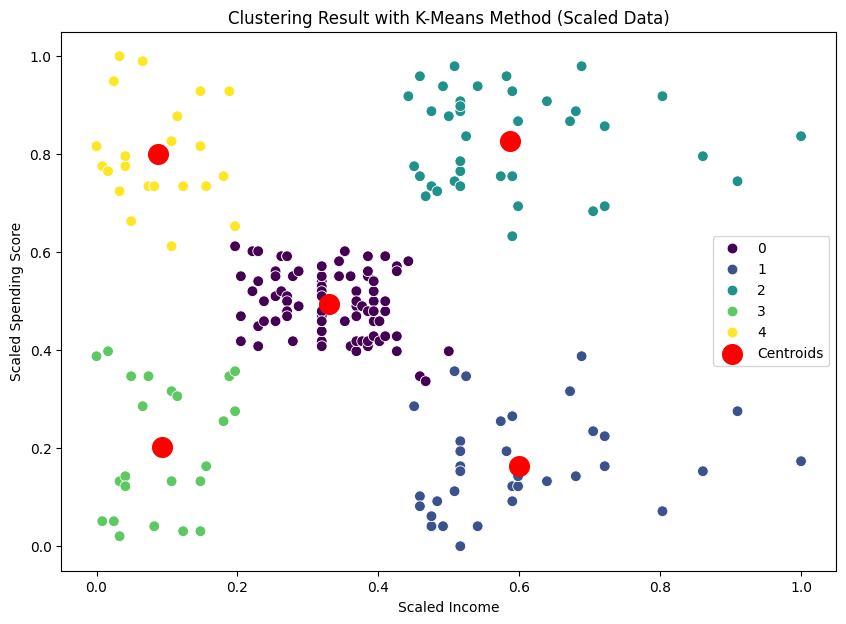

In [63]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Income", y = "Spending Score", hue=clusters, palette="viridis", data=df_minmax_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="red", label="Centroids")
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

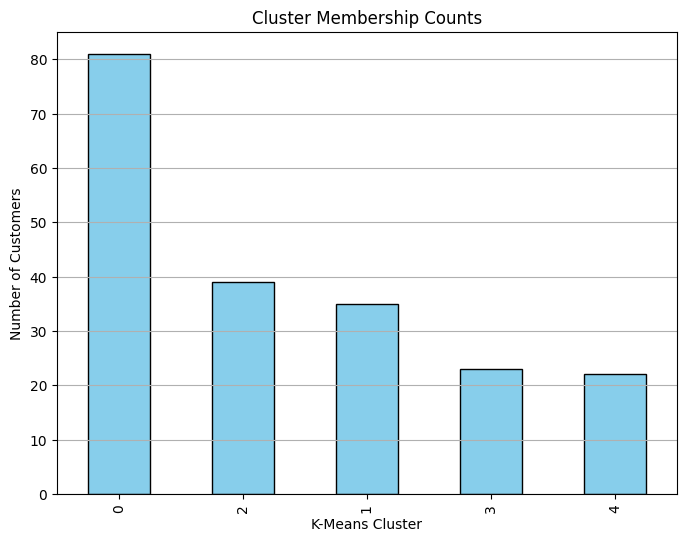

In [64]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [65]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby('KMeans_Cluster').agg({'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max'],
                                              'Spending Score': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age             Income          Spending Score        
                     mean min max       mean min  max           mean min max
KMeans_cluster                                                              
0               42.716049  18  70  55.296296  39   76      49.518519  34  61
1               41.114286  19  59  88.200000  70  137      17.114286   1  39
2               32.692308  27  40  86.538462  69  137      82.128205  63  97
3               45.217391  19  67  26.304348  15   39      20.913043   3  40
4               25.272727  18  35  25.727273  15   39      79.363636  61  99

# Managerial Implications Based on the Five Clusters

Based on the K-Means clustering with 5 clusters, we can identify distinct customer segments with different characteristics and spending behaviors. Analyzing the `cluster_summary` provides insights into each group:

**Cluster 0 - Middle-aged, moderate income, moderate spending**
*   **Profile:** This cluster has a moderate average age (around 43), moderate income (around $55k), and a moderate spending score (around 50). This group represents a large portion of the customer base.
*   **Implications:** This is a broad segment. Marketing strategies should be balanced, perhaps focusing on value and a wide range of products.

**Cluster 1 - Older, rich, low spending**
*   **Profile:** This cluster has a higher average age (around 41), high income (around $88k), but a low spending score (around 17). These customers have high purchasing power but are not spending much at the mall.
*   **Implications:** This is a key segment for targeted marketing. Focus on attracting their spending by offering premium goods, exclusive services, or loyalty programs that incentivize higher spending.

**Cluster 2 - Young, rich, high spending**
*   **Profile:** This cluster is characterized by a younger average age (around 33), high income (around $87k), and a high spending score (around 82). These are likely young professionals who are high earners and high spenders.
*   **Implications:** This is a valuable segment. Focus on maintaining their high engagement with trendy products, experiential retail, and digital marketing channels. Consider loyalty rewards for high spenders.

**Cluster 3 - Older, low income, low spending**
*   **Profile:** This cluster has the highest average age (around 45), low income (around $26k), and a low spending score (around 21). This group represents older customers with lower financial resources and low spending habits.
*   **Implications:** Strategies for this group might focus on essential goods, discounts, and promotions. Accessibility and community-focused marketing could be relevant.

**Cluster 4 - Young, low income, high spending**
*   **Profile:** This cluster has the lowest average age (around 25), low income (around $26k), but a high spending score (around 79). These are likely younger customers who are enthusiastic shoppers despite lower income.
*   **Implications:** This segment is highly responsive to trends and promotions. Utilize social media and influencer marketing. Offer affordable trendy items and engaging in-store experiences. Loyalty programs and discounts can encourage continued spending.